In [1]:
 pip install prophet


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install prophet pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# Load the dataset
df = pd.read_csv('C:/Users/pranjali.bhogle/Downloads/62098_PROPHET.csv')

# Rename columns to match Prophet's requirements
df.rename(columns={'DATE': 'ds', 'EPV': 'y'}, inplace=True)

# Convert 'ds' to datetime format
df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y')

In [37]:
# Initialize and fit the model
model = Prophet()
model.fit(df)
        

16:52:52 - cmdstanpy - INFO - Chain [1] start processing
16:52:52 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=90)  # Forecasting for the next 30 days

# Generate the forecast
forecast = model.predict(future)

# Limit the forecast to necessary columns
forecast_limited = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

forecast_limited  
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-06,2.573443,1.561949,3.303904,2.573443,2.573443,-0.147451,-0.147451,-0.147451,-0.147451,-0.147451,-0.147451,0.0,0.0,0.0,2.425992
1,2022-12-07,2.575380,1.629864,3.309677,2.575380,2.575380,-0.099777,-0.099777,-0.099777,-0.099777,-0.099777,-0.099777,0.0,0.0,0.0,2.475602
2,2022-12-08,2.577317,1.590886,3.320572,2.577317,2.577317,-0.129374,-0.129374,-0.129374,-0.129374,-0.129374,-0.129374,0.0,0.0,0.0,2.447943
3,2022-12-09,2.579253,1.765952,3.475349,2.579253,2.579253,0.095010,0.095010,0.095010,0.095010,0.095010,0.095010,0.0,0.0,0.0,2.674263
4,2022-12-10,2.581190,1.933123,3.584655,2.581190,2.581190,0.186095,0.186095,0.186095,0.186095,0.186095,0.186095,0.0,0.0,0.0,2.767285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,2024-10-29,1.476801,0.509342,2.187407,1.434428,1.522574,-0.147451,-0.147451,-0.147451,-0.147451,-0.147451,-0.147451,0.0,0.0,0.0,1.329350
694,2024-10-30,1.471729,0.575797,2.179785,1.428854,1.518456,-0.099777,-0.099777,-0.099777,-0.099777,-0.099777,-0.099777,0.0,0.0,0.0,1.371952
695,2024-10-31,1.466658,0.501014,2.128705,1.423262,1.514367,-0.129374,-0.129374,-0.129374,-0.129374,-0.129374,-0.129374,0.0,0.0,0.0,1.337284
696,2024-11-01,1.461587,0.722370,2.354813,1.417390,1.510274,0.095010,0.095010,0.095010,0.095010,0.095010,0.095010,0.0,0.0,0.0,1.556597


In [39]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

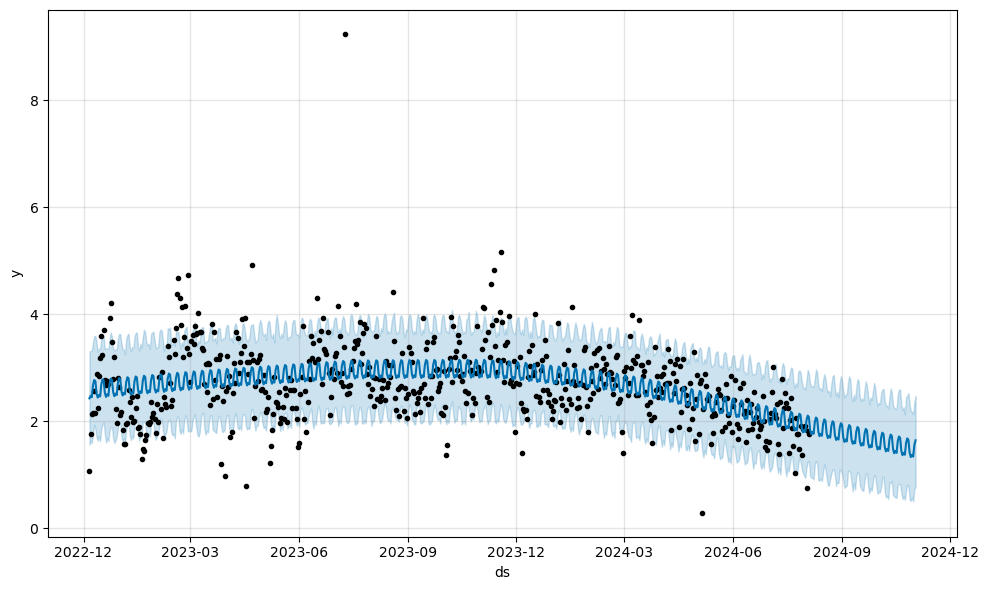

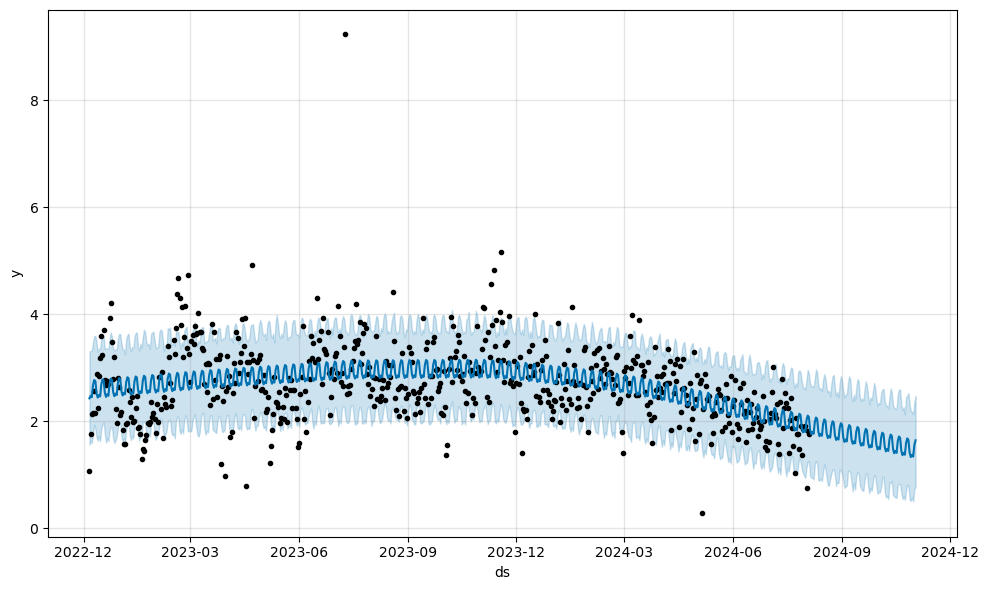

In [40]:
model.plot(forecast)

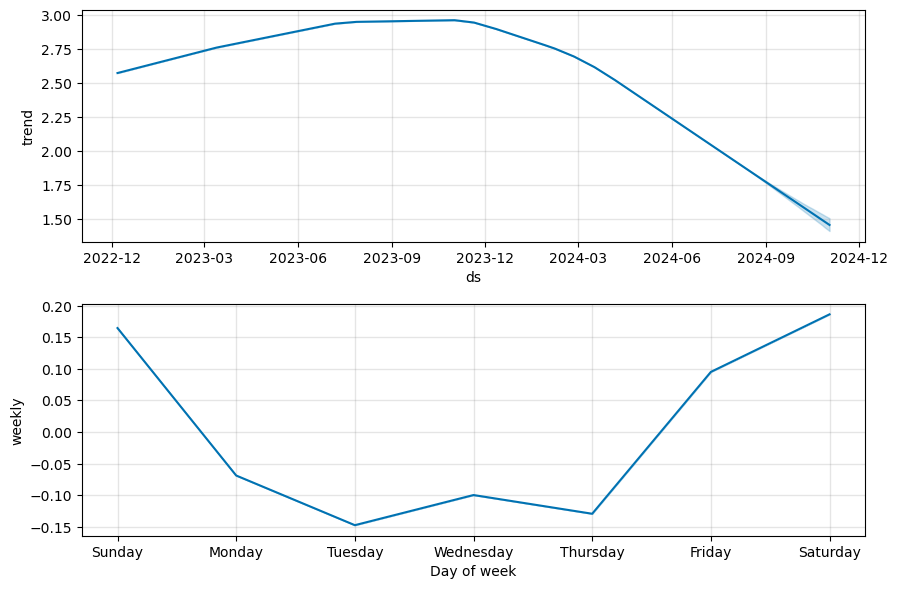

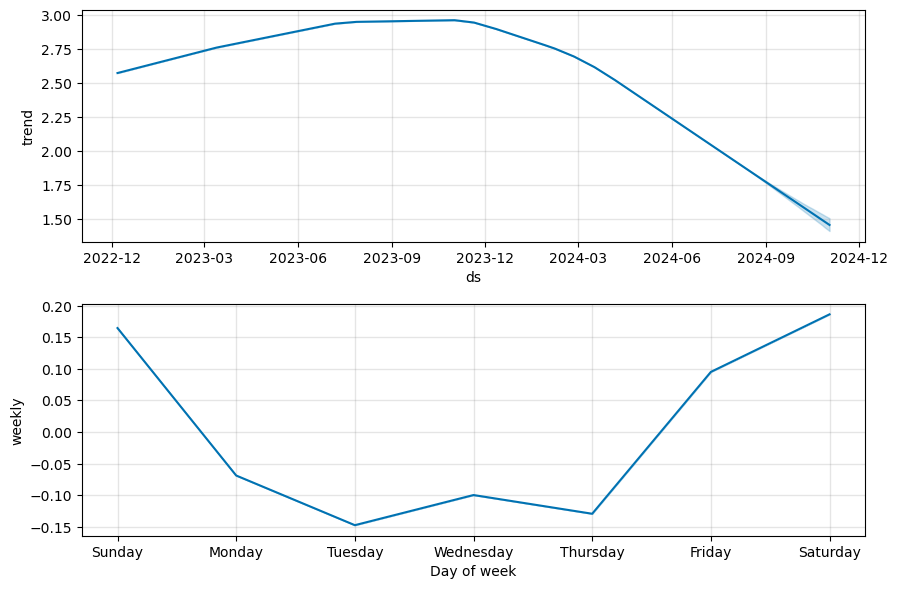

In [41]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(forecast)

In [42]:
df.head()

,ds,y
0,2022-12-06,1.070411
1,2022-12-07,1.769528
2,2022-12-08,2.132834
3,2022-12-09,2.152396
4,2022-12-10,2.564664


In [48]:
from prophet.diagnostics import cross_validation

# Perform cross-validation
df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='30 days')

# Display the results
df_cv.head()
df_cv

  0%|          | 0/3 [00:00<?, ?it/s]

16:57:46 - cmdstanpy - INFO - Chain [1] start processing
16:57:46 - cmdstanpy - INFO - Chain [1] done processing
16:57:46 - cmdstanpy - INFO - Chain [1] start processing
16:57:46 - cmdstanpy - INFO - Chain [1] done processing
16:57:46 - cmdstanpy - INFO - Chain [1] start processing
16:57:46 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-08,2.891367,1.924440,3.861785,2.431500,2024-01-07
1,2024-01-09,2.807257,1.923841,3.758555,2.298821,2024-01-07
2,2024-01-10,2.790192,1.872821,3.733736,3.075134,2024-01-07
3,2024-01-11,2.750070,1.787414,3.687477,2.610328,2024-01-07
4,2024-01-12,3.052174,2.094108,4.054486,2.201740,2024-01-07
...,...,...,...,...,...,...
85,2024-07-31,1.978329,1.149689,2.804956,1.869729,2024-07-05
86,2024-08-01,1.944803,1.095062,2.846374,1.910934,2024-07-05
87,2024-08-02,2.177265,1.239076,3.018970,0.743416,2024-07-05
88,2024-08-03,2.267888,1.302296,3.129798,1.825053,2024-07-05


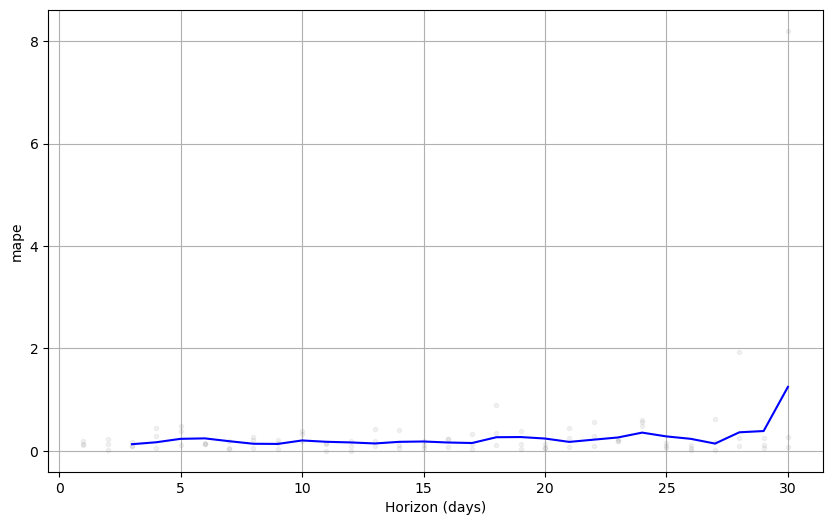

In [49]:
from prophet.plot import plot_cross_validation_metric

# Plot performance metrics using the correct function
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

